### Import necessary Libraries

In [1]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Getting the data

All datasets were already downloaded and stored in the IBM Db2 database. We need to first get all the data for further analysis.

#### Connect to the database

In [2]:
%load_ext sql
%sql ibm_db_sa://

'Connected: lsp45830@BLUDB'

#### Retreive data from the database

In [3]:
res = %sql SELECT * FROM CENSUS_DATA;

#retrieve the query results into a pandas dataframe
df_census = res.DataFrame()
df_census.head()

 * ibm_db_sa://lsp45830:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Number community_area_name percent_of_housing_crowded  \
0                    1.0         Rogers Park                        7.7   
1                    2.0          West Ridge                        7.8   
2                    3.0              Uptown                        3.8   
3                    4.0      Lincoln Square                        3.4   
4                    5.0        North Center                        0.3   

  percent_households_below_poverty percent_aged_16__unemployed  \
0                             23.6                         8.7   
1                             17.2                         8.8   
2                             24.0                         8.9   
3                             10.9                         8.2   
4                              7.5                         5.2   

  percent_aged_25__without_high_school_diploma  \
0                                         18.2   
1                                         20.8   
2                                         11.8   
3                                         13.4   
4                                          4.5   

  percent_aged_under_18_or_over_64  per_capita_income  hardship_index  
0                             27.5              23939            39.0  
1                             38.5              23040            46.0  
2                             22.2              35787            20.0  
3                             25.5              37524            17.0  
4                             26.2              57123             6.0

In [4]:
# sql query for Public Schools
res = %sql SELECT * FROM CHICAGO_PUBLIC_SCHOOLS;

#retrieve the query results into a pandas dataframe
df_schools = res.DataFrame()
df_schools.head()

 * ibm_db_sa://lsp45830:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


School_ID                                     Name_of_School  \
0     610038                  Abraham Lincoln Elementary School   
1     610281  Adam Clayton Powell Paideia Community Academy ...   
2     610185                Adlai E Stevenson Elementary School   
3     609993                    Agustin Lara Elementary Academy   
4     610513                      Air Force Academy High School   

  Elementary, Middle, or High School         Street_Address     City State  \
0                                 ES        615 W Kemper Pl  Chicago    IL   
1                                 ES  7511 S South Shore Dr  Chicago    IL   
2                                 ES     8010 S Kostner Ave  Chicago    IL   
3                                 ES     4619 S Wolcott Ave  Chicago    IL   
4                                 HS        3630 S Wells St  Chicago    IL   

   ZIP_Code    Phone_Number  \
0     60614  (773) 534-5720   
1     60649  (773) 535-6650   
2     60652  (773) 535-2280   
3     60609  (773) 535-4389   
4     60609  (773) 535-1590   

                                                Link  \
0  http://schoolreports.cps.edu/SchoolProgressRep...   
1  http://schoolreports.cps.edu/SchoolProgressRep...   
2  http://schoolreports.cps.edu/SchoolProgressRep...   
3  http://schoolreports.cps.edu/SchoolProgressRep...   
4  http://schoolreports.cps.edu/SchoolProgressRep...   

                      Network_Manager             ...               \
0        Fullerton Elementary Network             ...                
1           Skyway Elementary Network             ...                
2           Midway Elementary Network             ...                
3         Pershing Elementary Network             ...                
4  Southwest Side High School Network             ...                

        RCDTS_Code x_coordinate y_coordinate     Latitude     Longitude  \
0  150000000000000  1171699.458  1915829.428  41.92449696  -87.64452163   
1  150000000000000  1196129.985  1856209.466  41.76032435  -87.55673627   
2  150000000000000  1148427.165  1851012.215  41.74711093  -87.73170248   
3  150000000000000  1164504.290  1873959.199  41.80975690  -87.67214460   
4  150000000000000  1175177.622  1880745.126  41.82814609  -87.63279369   

  Community_Area_Number Community_Area_Name  Ward Police_District  \
0                     7        LINCOLN PARK    43              18   
1                    43         SOUTH SHORE     7               4   
2                    70             ASHBURN    13               8   
3                    61            NEW CITY    20               9   
4                    34       ARMOUR SQUARE    11               9   

                      Location  
0  (41.92449696, -87.64452163)  
1  (41.76032435, -87.55673627)  
2  (41.74711093, -87.73170248)  
3    (41.8097569, -87.6721446)  
4  (41.82814609, -87.63279369)  

[5 rows x 79 columns]

In [5]:
# sql query for Crime Data
res = %sql SELECT * FROM CHICAGO_CRIME_DATA;

#retrieve the query results into a pandas dataframe
df_crime = res.DataFrame()
df_crime.head()

 * ibm_db_sa://lsp45830:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


id Case_Number                    Date                     Block  \
0   3512276    HK587712  08/28/2004 05:50:56 PM        047XX S KEDZIE AVE   
1   3406613    HK456306  06/26/2004 12:40:00 PM  009XX N CENTRAL PARK AVE   
2   8002131    HT233595  04/04/2011 05:45:00 AM        043XX S WABASH AVE   
3   7903289    HT133522  12/30/2010 04:30:00 PM      083XX S KINGSTON AVE   
4  10402076    HZ138551  02/02/2016 07:30:00 PM           033XX W 66TH ST   

   iucr Primary_Type                    Description  \
0  0890        THEFT                  FROM BUILDING   
1  0820        THEFT                 $500 AND UNDER   
2  0820        THEFT                 $500 AND UNDER   
3  0840        THEFT  FINANCIAL ID THEFT: OVER $300   
4  0820        THEFT                 $500 AND UNDER   

           Location_Description Arrest Domestic  \
0            SMALL RETAIL STORE  False    False   
1                         OTHER  False    False   
2  NURSING HOME/RETIREMENT HOME  False    False   
3                     RESIDENCE  False    False   
4                         ALLEY  False    False   

               ...                Ward Community_Area FBI_Code X_Coordinate  \
0              ...                14.0           58.0       06    1155838.0   
1              ...                27.0           23.0       06    1152206.0   
2              ...                 3.0           38.0       06    1177436.0   
3              ...                 7.0           46.0       06    1194622.0   
4              ...                15.0           66.0       06    1155240.0   

  Y_Coordinate  Year              Updated_On            Latitude  \
0    1873050.0  2004  02/10/2018 03:50:01 PM  41.807440500000006   
1    1906127.0  2004  02/28/2018 03:56:25 PM        41.898279962   
2    1876313.0  2011  02/10/2018 03:50:01 PM        41.815933131   
3    1850125.0  2010  02/10/2018 03:50:01 PM        41.743665322   
4    1860661.0  2016  02/10/2018 03:50:01 PM        41.773455295   

            Longitude                       Location  
0  -87.70395584900000    (41.8074405, -87.703955849)  
1  -87.71640550500000  (41.898279962, -87.716405505)  
2  -87.62464212700000  (41.815933131, -87.624642127)  
3  -87.56246275600000  (41.743665322, -87.562462756)  
4  -87.70648047100000  (41.773455295, -87.706480471)  

[5 rows x 22 columns]

### Let's visualize crime in some communities

In [6]:
df_community = df_schools[['Community_Area_Number', 'Community_Area_Name']].drop_duplicates()
df_community.dtypes

Community_Area_Number     int64
Community_Area_Name      object
dtype: object

In [7]:
# convert some object columns to float
df_crime.dropna(inplace=True)
df_crime = df_crime.apply(pd.to_numeric, errors='ignore')
df_crime.dtypes

id                        int64
Case_Number              object
Date                     object
Block                    object
iucr                     object
Primary_Type             object
Description              object
Location_Description     object
Arrest                   object
Domestic                 object
Beat                      int64
District                float64
Ward                    float64
Community_Area          float64
FBI_Code                 object
X_Coordinate            float64
Y_Coordinate            float64
Year                      int64
Updated_On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
# Group by Community_Area and count the number of crime
df_grouped = df_crime
df_grouped = df_grouped.groupby('Community_Area', as_index=False)['Community_Area'].agg({"Count":"count"})

# get Community_Area_Name
df_grouped.rename(columns={'Community_Area':'Community_Area_Number'}, inplace=True) 
df_grouped = pd.merge(df_grouped, 
                      df_community,
                      how='left',
                      on = ['Community_Area_Number']).drop(['Community_Area_Number'], axis=1)

# sort dataframe on 'Count' column (descending)
df_top15 = df_grouped.set_index(['Community_Area_Name'])
df_top15.sort_values(by='Count', ascending=True, inplace=True)

# get top 15 areas
df_top15 = df_top15['Count'].tail(15)
df_top15

Community_Area_Name
WEST GARFIELD PARK        10
BRIGHTON PARK             10
LAKE VIEW                 11
ROSELAND                  11
GREATER GRAND CROSSING    11
WEST ENGLEWOOD            12
CHICAGO LAWN              12
WEST TOWN                 13
AUBURN GRESHAM            14
NEAR NORTH SIDE           15
NEAR WEST SIDE            16
NORTH LAWNDALE            16
ENGLEWOOD                 21
HUMBOLDT PARK             21
AUSTIN                    42
Name: Count, dtype: int64

In [9]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.3


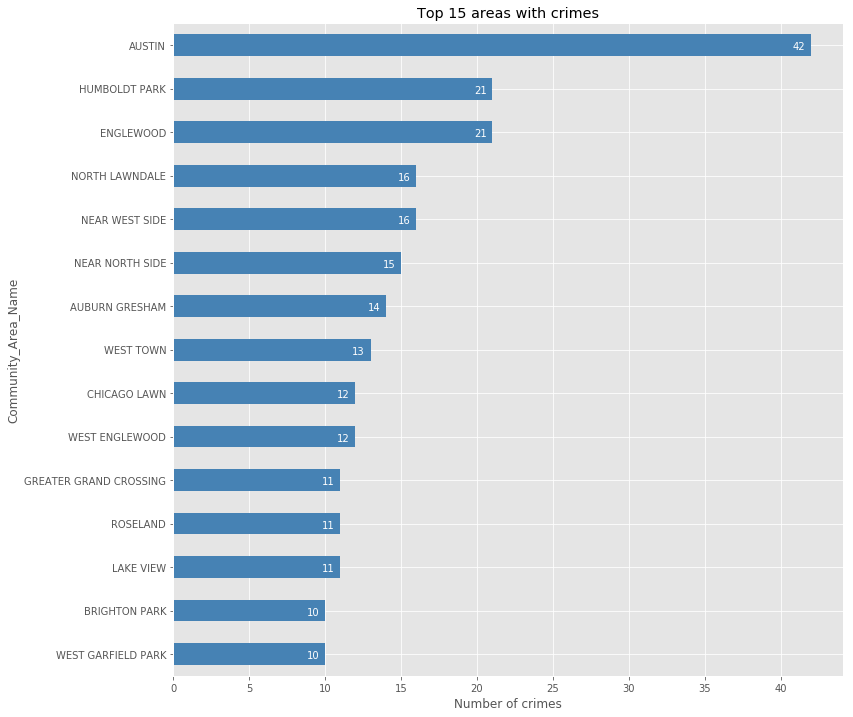

In [10]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of crimes')
plt.title('Top 15 areas with crimes')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = str(value) # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 1.2, index - 0.10), color='white')

plt.show()

In [11]:
df_top15 = df_grouped.copy()
df_top15.sort_values(by='Count', ascending=True, inplace=True)

# get top 15 areas
df_top15 = df_top15.head(15)
print(df_top15)

lats = []
longs = []
geolocator = Nominatim()
for area in df_top15.loc[:,'Community_Area_Name']:
    location = geolocator.geocode(area)
    lats.append(location.latitude)
    longs.append(location.longitude) 

df_top15['Latitude'] = lats
df_top15['Longitude'] = longs
df_top15.drop(['Count'], axis=1, inplace=True)
df_top15.reset_index(inplace=True)
print(df_top15)

    Count Community_Area_Name
30      1     NEAR SOUTH SIDE
67      1         MORGAN PARK
41      1            BURNSIDE
53      1          BRIDGEPORT
49      1           HEGEWISCH
10      1         FOREST GLEN
35      2           HYDE PARK
15      2           MONTCLARE
46      2           EAST SIDE
48      2           RIVERDALE
69      2           EDGEWATER
50      2      GARFIELD RIDGE
52      2       MCKINLEY PARK
57      2            CLEARING
32      2         FULLER PARK


/home/biosys/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


    index Community_Area_Name   Latitude   Longitude
0      30     NEAR SOUTH SIDE  41.856700  -87.624774
1      67         MORGAN PARK  41.690312  -87.666716
2      41            BURNSIDE -34.944479  138.647266
3      53          BRIDGEPORT  41.167041  -73.204835
4      49           HEGEWISCH  41.653646  -87.546988
5      10         FOREST GLEN  44.087959  -65.923618
6      35           HYDE PARK  51.507489   -0.162195
7      15           MONTCLARE  41.925309  -87.800893
8      46           EAST SIDE  41.100614  -80.636741
9      48           RIVERDALE  41.544478  -90.458188
10     69           EDGEWATER  40.827045  -73.975694
11     50      GARFIELD RIDGE  41.803617  -87.745494
12     52       MCKINLEY PARK  41.831700  -87.673664
13     57            CLEARING  41.780588  -87.773388
14     32         FULLER PARK  41.818089  -87.632551


In [12]:
# create map of top 15 crime areas in Chicago using latitude and longitude values
latitude = df_top15.loc[0, 'Latitude']
longitude = df_top15.loc[0, 'Longitude']
print(type(latitude))
map_crime = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_top15['Latitude'], df_top15['Longitude'], df_top15['Community_Area_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_crime)  

'''
for lat, lng, label in zip(healthy_schools['Latitude'], healthy_schools['Longitude'], healthy_schools['Community_Area_Number']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_crime)    '''
map_crime

<class 'numpy.float64'>


### Let's find top 10 community by number of puclic schoools

In [14]:
# Top 10 community by number of puclic schoools
res = %sql SELECT "Community_Area_Name",\
        COUNT("Elementary, Middle, or High School") AS "Number of Schools" FROM "CHICAGO_PUBLIC_SCHOOLS"\
        GROUP BY "Community_Area_Name"\
        ORDER BY "Number of Schools" DESC\
        LIMIT 10;
community_top10 = res.DataFrame()
community_top10 = community_top10.apply(pd.to_numeric, errors='ignore')
community_top10.set_index(['Community_Area_Name'], inplace=True)
community_top10

 * ibm_db_sa://lsp45830:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Number of Schools
Community_Area_Name                   
AUSTIN                            23.0
SOUTH LAWNDALE                    22.0
WEST TOWN                         20.0
ENGLEWOOD                         17.0
NEAR WEST SIDE                    16.0
NORTH LAWNDALE                    16.0
EAST GARFIELD PARK                13.0
ROSELAND                          13.0
NEW CITY                          13.0
HUMBOLDT PARK                     13.0

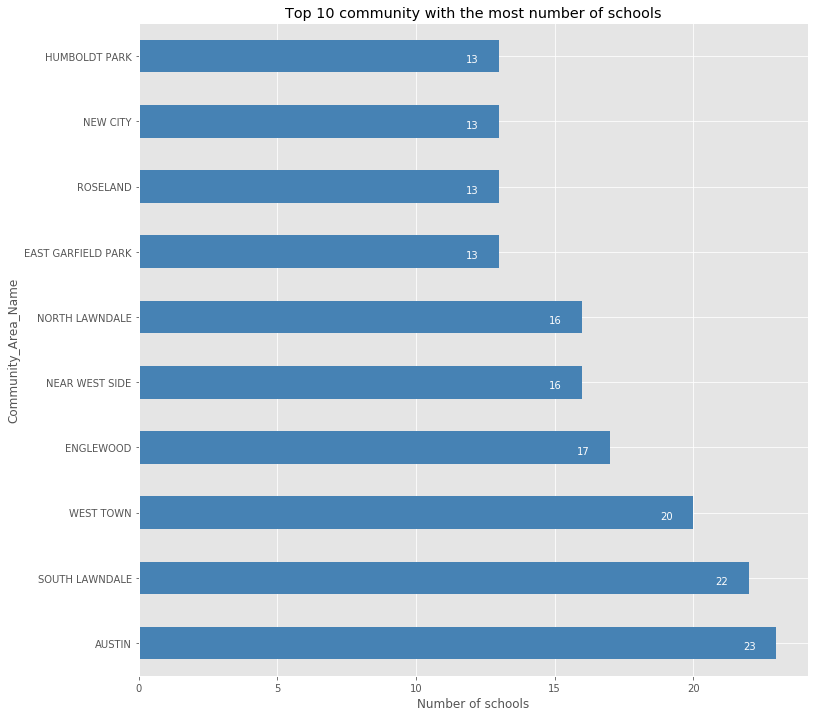

In [15]:
df_top10 = community_top10['Number of Schools']

df_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')

# annotate value labels to each country
for index, value in enumerate(df_top10): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 1.2, index - 0.10), color='white')

plt.xlabel('Number of schools')
plt.title('Top 10 community with the most number of schools')
plt.show()

It seems to be that SOUTH LAWNDALE is a community with a good number of schools and the lowest number of crime as well. We could analysis it's venues furthure thanks to Foursquare

### Let's explore SOUTH LAWNDALE 	

#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

#### Use geopy library to get the latitude and longitude values of SOUTH LAWNDALE

In [17]:
address = 'SOUTH LAWNDALE'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of SOUTH LAWNDALE are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of SOUTH LAWNDALE are 41.8436437, -87.7125544.


/home/biosys/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
south_lawndale_venues = getNearbyVenues(names=['SOUTH LAWNDALE'],
                                   latitudes=[41.8436437],
                                   longitudes=[-87.7125544]
                                  )
south_lawndale_venues

SOUTH LAWNDALE


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   SOUTH LAWNDALE              41.843644              -87.712554   
1   SOUTH LAWNDALE              41.843644              -87.712554   
2   SOUTH LAWNDALE              41.843644              -87.712554   
3   SOUTH LAWNDALE              41.843644              -87.712554   
4   SOUTH LAWNDALE              41.843644              -87.712554   
5   SOUTH LAWNDALE              41.843644              -87.712554   
6   SOUTH LAWNDALE              41.843644              -87.712554   
7   SOUTH LAWNDALE              41.843644              -87.712554   
8   SOUTH LAWNDALE              41.843644              -87.712554   
9   SOUTH LAWNDALE              41.843644              -87.712554   
10  SOUTH LAWNDALE              41.843644              -87.712554   
11  SOUTH LAWNDALE              41.843644              -87.712554   
12  SOUTH LAWNDALE              41.843644              -87.712554   
13  SOUTH LAWNDALE              41.843644              -87.712554   
14  SOUTH LAWNDALE              41.843644              -87.712554   
15  SOUTH LAWNDALE              41.843644              -87.712554   
16  SOUTH LAWNDALE              41.843644              -87.712554   
17  SOUTH LAWNDALE              41.843644              -87.712554   
18  SOUTH LAWNDALE              41.843644              -87.712554   
19  SOUTH LAWNDALE              41.843644              -87.712554   
20  SOUTH LAWNDALE              41.843644              -87.712554   
21  SOUTH LAWNDALE              41.843644              -87.712554   
22  SOUTH LAWNDALE              41.843644              -87.712554   
23  SOUTH LAWNDALE              41.843644              -87.712554   
24  SOUTH LAWNDALE              41.843644              -87.712554   
25  SOUTH LAWNDALE              41.843644              -87.712554   
26  SOUTH LAWNDALE              41.843644              -87.712554   
27  SOUTH LAWNDALE              41.843644              -87.712554   
28  SOUTH LAWNDALE              41.843644              -87.712554   
29  SOUTH LAWNDALE              41.843644              -87.712554   
30  SOUTH LAWNDALE              41.843644              -87.712554   
31  SOUTH LAWNDALE              41.843644              -87.712554   
32  SOUTH LAWNDALE              41.843644              -87.712554   
33  SOUTH LAWNDALE              41.843644              -87.712554   
34  SOUTH LAWNDALE              41.843644              -87.712554   
35  SOUTH LAWNDALE              41.843644              -87.712554   
36  SOUTH LAWNDALE              41.843644              -87.712554   
37  SOUTH LAWNDALE              41.843644              -87.712554   
38  SOUTH LAWNDALE              41.843644              -87.712554   
39  SOUTH LAWNDALE              41.843644              -87.712554   
40  SOUTH LAWNDALE              41.843644              -87.712554   
41  SOUTH LAWNDALE              41.843644              -87.712554   
42  SOUTH LAWNDALE              41.843644              -87.712554   
43  SOUTH LAWNDALE              41.843644              -87.712554   
44  SOUTH LAWNDALE              41.843644              -87.712554   
45  SOUTH LAWNDALE              41.843644              -87.712554   
46  SOUTH LAWNDALE              41.843644              -87.712554   
47  SOUTH LAWNDALE              41.843644              -87.712554   
48  SOUTH LAWNDALE              41.843644              -87.712554   
49  SOUTH LAWNDALE              41.843644              -87.712554   
50  SOUTH LAWNDALE              41.843644              -87.712554   
51  SOUTH LAWNDALE              41.843644              -87.712554   

                                   Venue  Venue Latitude  Venue Longitude  \
0          La Catedral Cafe & Restaurant       41.846218       -87.708894   
1                 Restaurante Nuevo Leon       41.844396       -87.717063   
2                                 Azucar       41.842580       -87.715514   
3                       Moreno's Liquors

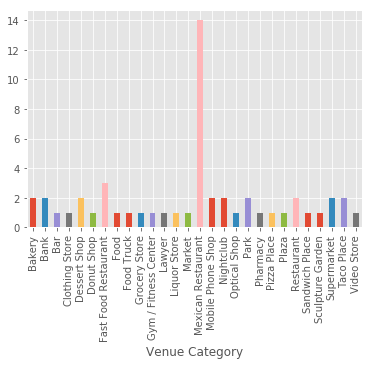

In [23]:
df = south_lawndale_venues.groupby(['Venue Category'])['Neighborhood'].count()

df.plot.bar()